In [1]:
import numpy as np
from PIL import Image
from keras.applications import ResNet50
from keras.preprocessing.image import img_to_array
from keras.applications import imagenet_utils
from io import BytesIO
import os
import requests


**Eğitilmiş verilerin yüklenmesi**


In [2]:
model= ResNet50(weights = "imagenet")

102967424/102967424 [==============================] - 0s 0us/step


**Resmi girişe uygun hale getirmek için yeniden boyutlandırma  fonksiyonunun tanımlanması**

In [3]:
def prepare_image(image, target):
  #giriş görüntüsünü yeniden boyutlandırma veön işlemlerin yapılması
  image = image.resize(target)
  image = img_to_array(image)
  image=np.expand_dims(image, axis=0)
  image = imagenet_utils.preprocess_input(image)
  return image #işlenmiş görüntüyü alma

**Sınıflandırma istediğimiz görselin web adresini alana girelim**

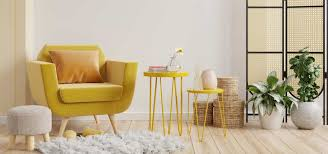

In [55]:
ImageURL="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRdYI9sEI9E4u9anWzad9S2oZHXSpVEmK9oPQ&usqp=CAU"
response = requests.get(ImageURL)
image = Image.open(BytesIO(response.content))
image

In [56]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [57]:
data = {"success": False}
pre_image = prepare_image(image, target=(224,224)) #224x224 boyutlu hale getirme
preds = model.predict(pre_image) #kestirim modeline ön işlemden geçmiş görüntüyü uygula
results = imagenet_utils.decode_predictions(preds) #kestirim
data["predictions"]=[]
for (imagenetID, label, prob) in results[0]: #imagenet veri kümesinden etiket, olasılık ve kestirim sonucu al
    r = {"label":label, "probability": float(prob)}
    data['predictions'].append(r)
data['success']=True
print(data)




1/1 [==============================] - 0s 22ms/step
{'success': True, 'predictions': [{'label': 'dining_table', 'probability': 0.36959919333457947}, {'label': 'studio_couch', 'probability': 0.13918490707874298}, {'label': 'window_shade', 'probability': 0.11651180684566498}, {'label': 'shower_curtain', 'probability': 0.05949200317263603}, {'label': 'rocking_chair', 'probability': 0.034588053822517395}]}


In [58]:
print("Sınıflandırma tahmini en yüksek olan {0} oranıyla {1}'dır. ".format(data["predictions"][0]["probability"], data["predictions"][0]["label"]))

Sınıflandırma tahmini en yüksek olan 0.36959919333457947 oranıyla dining_table'dır. 
